In [1]:
# This is an implementation of Dino https://github.com/open-mmlab/mmdetection/blob/main/configs/dino/README.md

from mmengine.utils import get_git_hash
from mmengine.utils.dl_utils import collect_env as collect_base_env

import mmdet


def collect_env():
    """Collect the information of the running environments."""
    env_info = collect_base_env()
    env_info['MMDetection'] = f'{mmdet.__version__}+{get_git_hash()[:7]}'
    return env_info


if __name__ == '__main__':
    for name, val in collect_env().items():
        print(f'{name}: {val}')

# Step 2: Download the Config File and Pretrained Weights for DINO
import os

# Creating directory for checkpoints
os.makedirs('checkpoints', exist_ok=True)


sys.platform: linux
Python: 3.10.16 (main, Dec 11 2024, 16:24:50) [GCC 11.2.0]
CUDA available: True
numpy_random_seed: 2147483648
GPU 0: NVIDIA GeForce GTX 1070
CUDA_HOME: /usr
NVCC: Cuda compilation tools, release 12.0, V12.0.140
GCC: gcc (Ubuntu 13.3.0-6ubuntu2~24.04) 13.3.0
PyTorch: 2.5.1
PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2023.1-Product Build 20230303 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.5.3 (Git Hash 66f0cb9eb66affd2da3bf5f8d897376f04aae6af)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 12.4
  - NVCC architecture flags: -gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_61,code=sm_61;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch=compute_80,code=sm_80;-gencode;arch=comp

In [4]:
# Download DINO Config
!wget https://raw.githubusercontent.com/open-mmlab/mmdetection/main/configs/dino/dino-5scale_swin-l_8xb2-36e_coco.py

# Download Pretrained Weights
!wget https://github.com/RistoranteRist/mmlab-weights/releases/download/dino-swinl/dino-5scale_swin-l_8xb2-36e_coco-5486e051.pth



--2025-03-15 16:22:43--  https://raw.githubusercontent.com/open-mmlab/mmdetection/main/configs/dino/dino-5scale_swin-l_8xb2-36e_coco.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
connected. to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... 
HTTP request sent, awaiting response... 200 OK
Length: 326 [text/plain]
Saving to: ‘dino-5scale_swin-l_8xb2-36e_coco.py.1’

dino-5scale_swin-l_ 100%[===================>]     326  --.-KB/s    in 0s      

2025-03-15 16:22:43 (2.32 MB/s) - ‘dino-5scale_swin-l_8xb2-36e_coco.py.1’ saved [326/326]

--2025-03-15 16:22:43--  https://github.com/RistoranteRist/mmlab-weights/releases/download/dino-swinl/dino-5scale_swin-l_8xb2-36e_coco-5486e051.pth
4.237.22.38ithub.com (github.com)... 
connected. to github.com (github.com)|4.237.22.38|:443... 
HTTP request sent, awaiting response... 302 Found
Location: https://objects.githubusercontent.com/github-pro

In [16]:
!cd /media/saadi/Drive/Thesis_Folder/Thesis_2022/mmdetection/
!ls -l dino-5scale_swin-l_8xb2-12e_coco.py
!wget https://raw.githubusercontent.com/open-mmlab/mmdetection/main/configs/dino/dino-4scale_r50_8xb2-12e_coco.py \
 -P /media/saadi/Drive/Thesis_Folder/Thesis_2022/mmdetection/

config_file = '/media/saadi/Drive/Thesis_Folder/Thesis_2022/mmdetection/dino-5scale_swin-l_8xb2-12e_coco.py'

-rwxrwxrwx 1 saadi saadi 1119 Mar 15 16:31 dino-5scale_swin-l_8xb2-12e_coco.py
--2025-03-15 16:36:34--  https://raw.githubusercontent.com/open-mmlab/mmdetection/main/configs/dino/dino-4scale_r50_8xb2-12e_coco.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
connected. to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... 
200 OKequest sent, awaiting response... 
Length: 5783 (5.6K) [text/plain]
Saving to: ‘/media/saadi/Drive/Thesis_Folder/Thesis_2022/mmdetection/dino-4scale_r50_8xb2-12e_coco.py’

dino-4scale_r50_8xb 100%[===================>]   5.65K  --.-KB/s    in 0.002s  

2025-03-15 16:36:35 (3.49 MB/s) - ‘/media/saadi/Drive/Thesis_Folder/Thesis_2022/mmdetection/dino-4scale_r50_8xb2-12e_coco.py’ saved [5783/5783]



In [20]:
from mmdet.apis import init_detector, inference_detector
import mmcv
from mmengine.visualization import Visualizer
import matplotlib.pyplot as plt
#from mmdet.registry import VISUALIZERS

# Initialize DINO model with downloaded config and pretrained weights
config_file = './configs/dino/dino-5scale_swin-l_8xb2-12e_coco.py'
checkpoint_file = 'dino-5scale_swin-l_8xb2-36e_coco-5486e051.pth'

device = 'cuda:0' # or 'cpu'
model = init_detector(config_file, checkpoint_file, device=device)

# Example Image URL

image_path = './demo/demo.jpg'

# Perform inference
result = inference_detector(model, image_path)

# Visualize results
visualizer = Visualizer(image_path, show=False)
visualizer.dataset_meta = model.dataset_meta
visualizer.add_datasample('result', image_path, data_sample=result, draw_gt=False, pred_score_thr=0.3)
vis_image = visualizer.get_image()

plt.figure(figsize=(12, 8))
plt.imshow(mmcv.bgr2rgb(vis_image))
plt.axis('off')
plt.show()


Loads checkpoint by local backend from path: dino-5scale_swin-l_8xb2-36e_coco-5486e051.pth


TypeError: Visualizer.__init__() got an unexpected keyword argument 'show'

Loads checkpoint by local backend from path: dino-5scale_swin-l_8xb2-36e_coco-5486e051.pth


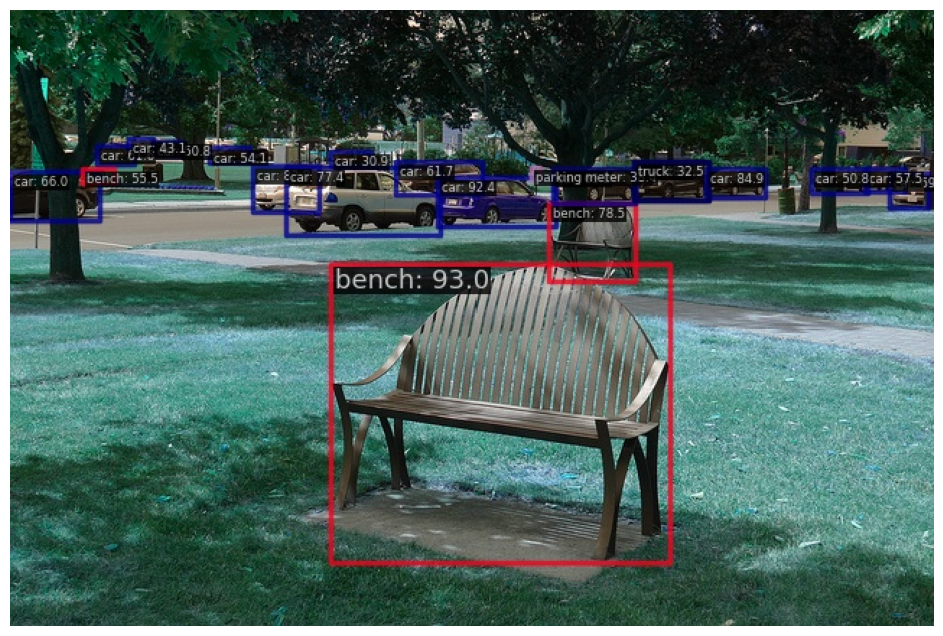

In [25]:
from mmdet.apis import init_detector, inference_detector
from mmdet.registry import VISUALIZERS
import mmcv
import matplotlib.pyplot as plt
import os

# Initialize detector
config_file = 'configs/dino/dino-5scale_swin-l_8xb2-12e_coco.py'
checkpoint_file = 'dino-5scale_swin-l_8xb2-36e_coco-5486e051.pth'

device = 'cuda:0'  # or 'cpu'
model = init_detector(config_file, checkpoint_file, device=device)

# Run inference
img_path = './demo/demo.jpg'
img = mmcv.imread(img_path)
result = inference_detector(model, img)

# Correct initialization of Visualizer with save_dir specified
from mmdet.registry import VISUALIZERS
visualizer = VISUALIZERS.build(
    dict(
        type='DetLocalVisualizer', 
        name='visualizer',
        save_dir='./visualization_results'
    )
)
visualizer.dataset_meta = model.dataset_meta

# Add inference results and save visualization
visualizer.add_datasample(
    'result',
    img,
    data_sample=result,
    draw_gt=False,
    pred_score_thr=0.3,
    out_file='./demo/dino_demo_result.jpg'
)

# Display the image
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
result_img = mmcv.imread('dino_demo_result.jpg')
plt.imshow(mmcv.bgr2rgb(result_img))
plt.axis('off')
plt.show()
